Categories of problems
1. time lag
    +6 min
    -6 min
    larger than 6 min
    smaller than -6 min
2. Vertical offset after time correction of 10 or more points
    +1 cm
    -1 cm
    +5 mm
    -5 mm
3. repeated points
    doccument how many?
4. NOAA gap fill
    any gap that NOAA has filled 30+ min


Switch to station datum

In [4]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [5]:
p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
#p21_9300_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)

p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
#p21_0112_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)

p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
#p21_1323_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_74307/1002497903.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_74307/1002497903.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_74307/1002497903.py:9: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')


In [7]:
directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'
#directory_path = r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\NOAA\pier21'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)

In [8]:
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1993 0000,1.491,1.733,1.453
1,01-01-1993 0006,1.491,NaN,1.456
2,01-01-1993 0012,1.496,NaN,1.458
3,01-01-1993 0018,1.503,NaN,1.461
4,01-01-1993 0024,1.512,NaN,1.464


In [9]:
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)

In [10]:
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1996 0000,1.634,1.911,1.550
1,01-01-1996 0006,1.648,NaN,1.549
2,01-01-1996 0012,1.657,NaN,1.547
3,01-01-1996 0018,1.664,NaN,1.546
4,01-01-1996 0024,1.654,NaN,1.545


In [11]:
comparison_df = pd.DataFrame()
comparison_df['Dates'] = p21_LH['#date+time']
comparison_df['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df.head(10)

,Dates,Lighthouse WL,NOAA WL
0,01-01-1996 0000,1.634,1.634
1,01-01-1996 0006,1.648,1.648
2,01-01-1996 0012,1.657,1.657
3,01-01-1996 0018,1.664,1.664
4,01-01-1996 0024,1.654,1.654
5,01-01-1996 0030,1.647,1.647
6,01-01-1996 0036,1.66,1.660
7,01-01-1996 0042,1.655,1.655
8,01-01-1996 0048,1.652,1.652
9,01-01-1996 0054,1.627,1.627


In [12]:
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.547,1.548
2454476,2023-12-31 23:36:00,1.548,1.542
2454477,2023-12-31 23:42:00,1.542,1.553
2454478,2023-12-31 23:48:00,1.553,1.579
2454479,2023-12-31 23:54:00,1.579,1.580


(1.0, 2.0)

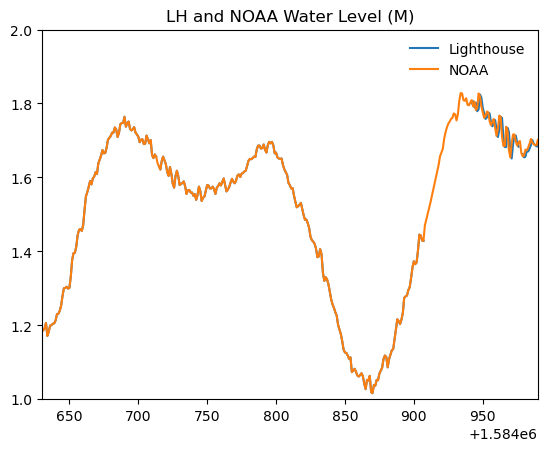

In [50]:
plt.plot(comparison_df['Lighthouse WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(1584630,1584990)
plt.ylim(1,2)

In [14]:
for i in range(len(comparison_df)):
    if comparison_df.loc[i]['Lighthouse WL'] != comparison_df.loc[i]['NOAA WL']:
        print(comparison_df.loc[i]['Dates'])
        break


1996-04-23 00:54:00


In [15]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


In [52]:
comparison_df[1584907:1584947]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1584907,2014-01-29 18:42:00,1.428,1.428,1.428
1584908,2014-01-29 18:48:00,NaN,1.470,NaN
1584909,2014-01-29 18:54:00,NaN,1.485,NaN
1584910,2014-01-29 19:00:00,NaN,1.500,NaN
1584911,2014-01-29 19:06:00,NaN,1.516,NaN
1584912,2014-01-29 19:12:00,NaN,1.531,NaN
1584913,2014-01-29 19:18:00,NaN,1.548,NaN
1584914,2014-01-29 19:24:00,NaN,1.565,NaN
1584915,2014-01-29 19:30:00,NaN,1.582,NaN
1584916,2014-01-29 19:36:00,NaN,1.599,NaN


Data coming back in from lighthouse looks to be off by 6 min and 0.003M offset

In [47]:
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(1584941,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[1584837:1584947]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1584837,2014-01-29 11:42:00,1.324,1.324,1.324
1584838,2014-01-29 11:48:00,1.311,1.311,1.311
1584839,2014-01-29 11:54:00,1.290,1.290,1.290
1584840,2014-01-29 12:00:00,1.270,1.270,1.270
1584841,2014-01-29 12:06:00,1.256,1.256,1.256
...,...,...,...,...
1584942,2014-01-29 22:12:00,1.800,1.809,1.806
1584943,2014-01-29 22:18:00,1.806,1.792,1.789
1584944,2014-01-29 22:24:00,1.789,1.805,1.802
1584945,2014-01-29 22:30:00,1.802,1.782,1.779


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'LH and NOAA Water Level (M)')

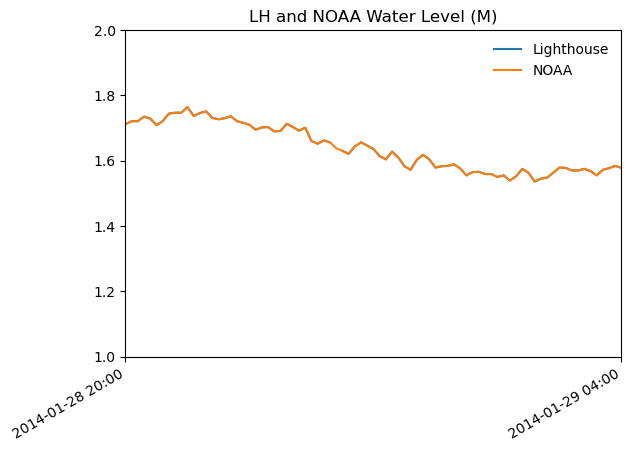

In [48]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1,2)

start_date = pd.to_datetime('2014-01-28 20:00')

end_date = pd.to_datetime('2014-01-29 04:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('LH and NOAA Water Level (M)')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'LH and NOAA Water Level (M)')

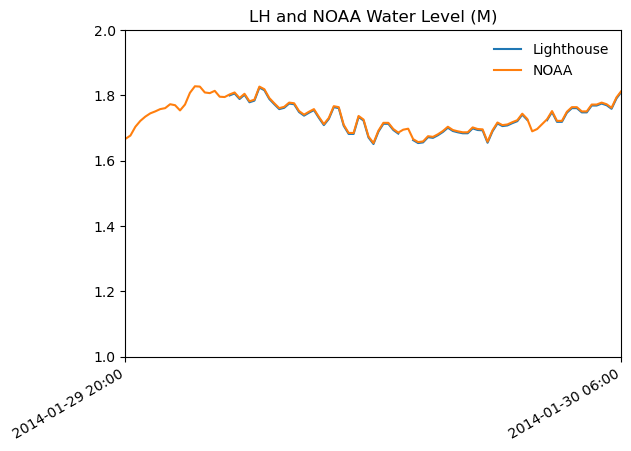

In [49]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1,2)

start_date = pd.to_datetime('2014-01-29 20:00')

end_date = pd.to_datetime('2014-01-30 06:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('LH and NOAA Water Level (M)')

In [20]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)

cleaned_remaining_differences.to_clipboard()

Finds the Double points

In [21]:

mask = comparison_df['NOAA WL'] == comparison_df['NOAA WL'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and dates
double_values = comparison_df.loc[mask, 'NOAA WL'].to_frame()
double_dates = comparison_df.loc[mask, 'Dates'].to_frame()

In [22]:
len(double_values)

91399

In [23]:
double_dates

,Dates
20,1996-01-01 02:00:00
31,1996-01-01 03:06:00
41,1996-01-01 04:06:00
49,1996-01-01 04:54:00
50,1996-01-01 05:00:00
...,...
2454324,2023-12-31 08:24:00
2454341,2023-12-31 10:06:00
2454348,2023-12-31 10:48:00
2454397,2023-12-31 15:42:00


In [24]:
comparison_df[19:32]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
19,1996-01-01 01:54:00,1.658,1.658,1.658
20,1996-01-01 02:00:00,1.644,1.644,1.644
21,1996-01-01 02:06:00,1.644,1.644,1.644
22,1996-01-01 02:12:00,1.648,1.648,1.648
23,1996-01-01 02:18:00,1.670,1.670,1.670
24,1996-01-01 02:24:00,1.680,1.680,1.680
25,1996-01-01 02:30:00,1.685,1.685,1.685
26,1996-01-01 02:36:00,1.688,1.688,1.688
27,1996-01-01 02:42:00,1.676,1.676,1.676
28,1996-01-01 02:48:00,1.687,1.687,1.687


Filters the differences to anything greater than 0.005

In [25]:
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]

len(cleaned_remaining_differences)

249768

In [26]:
for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


In [27]:
false_count = cleaned_remaining_differences['All_Next_10_Equal'].value_counts()[False]
false_count

141818

Drops all false values

In [28]:
mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)


In [29]:
cleaned_remaining_differences

,Difference,Date,All_Next_10_Equal
0,-0.006,2009-07-14 10:48:00,True
1,-0.005,2011-10-11 14:18:00,True
2,-0.005,2011-10-11 14:30:00,True
3,-0.005,2011-10-11 15:18:00,True
4,-0.005,2011-10-11 15:24:00,True
...,...,...,...
107945,-0.021,2023-05-29 17:30:00,True
107946,-0.021,2023-05-29 17:36:00,True
107947,-0.021,2023-05-29 17:42:00,True
107948,-0.021,2023-05-29 17:48:00,True


Looking in excell 
2009-07-14 10:48 -0.006 difference
2011-10-11 14:18 - 2011-11-01 08:06 -0.005 offset
2020-11-16 13:18 - 2023-04-27 13:42 -0.01 offset
2023-04-28 16:48 - 2023-04-30 20:24 0.008 offset
2023-05-09 00:54 - 2023-05-29 17:54 -0.12 offset

Looking further at the data in july for 2007 there are offsets everhwehre that arent equal correction will be close to impossible

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.006 Offset')

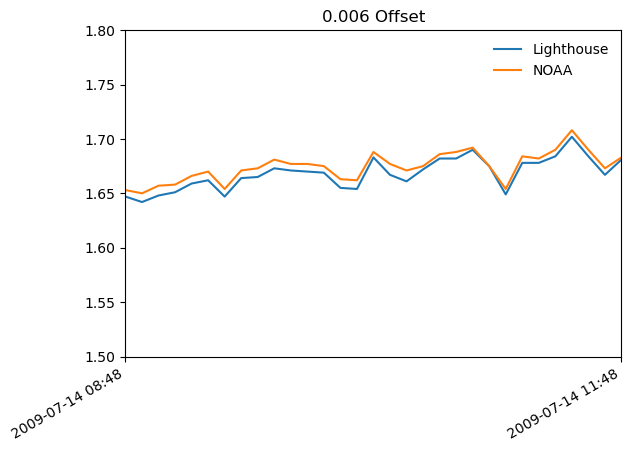

In [30]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,1.8)

start_date = pd.to_datetime('2009-07-14 08:48')

end_date = pd.to_datetime('2009-07-14 11:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.006 Offset')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Begining')

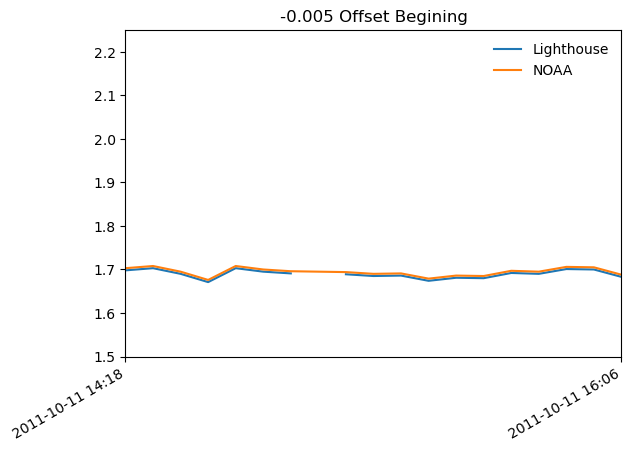

In [31]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.25)

start_date = pd.to_datetime('2011-10-11 14:18')

end_date = pd.to_datetime('2011-10-11 16:06')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Begining')

Once again looking at the data in an excell spreadsheet the values are all over the place 

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.005 Offset Ending')

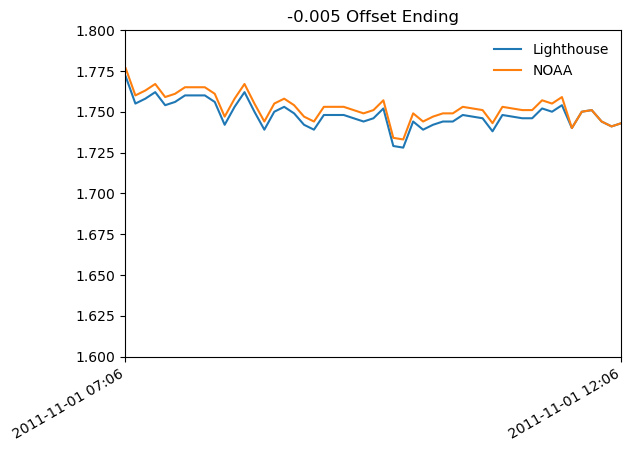

In [32]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,1.8)

start_date = pd.to_datetime('2011-11-01 07:06')

end_date = pd.to_datetime('2011-11-01 12:06')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.005 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.01 Offset Begining')

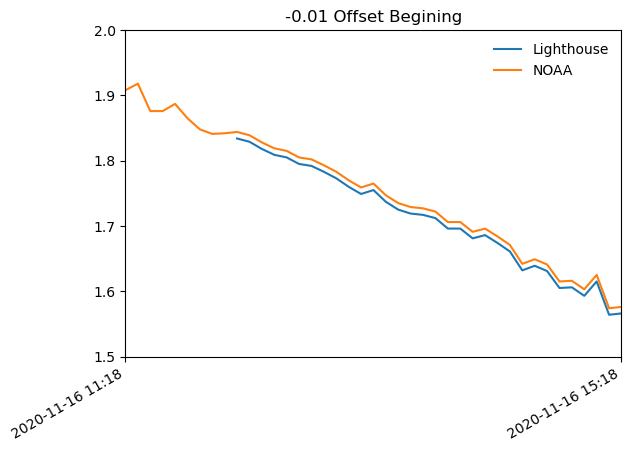

In [33]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2)

start_date = pd.to_datetime('2020-11-16 11:18')

end_date = pd.to_datetime('2020-11-16 15:18')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.01 Offset Begining')

No Idea what is happening here

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.01 Offset Ending')

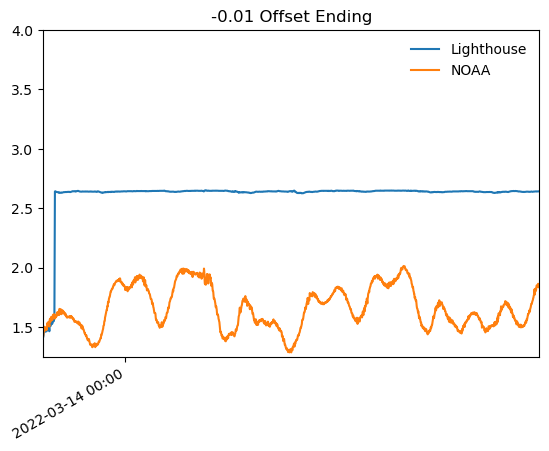

In [34]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.25,4)

start_date = pd.to_datetime('2022-03-12 17:00')

end_date = pd.to_datetime('2022-03-20 12:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.01 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.008 Offset Begining')

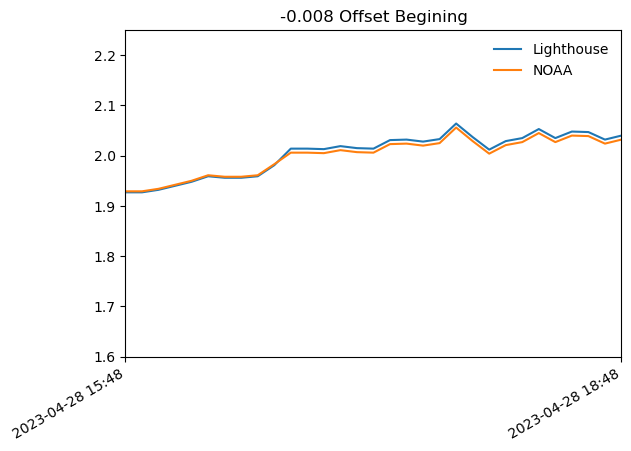

In [35]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.6,2.25)

start_date = pd.to_datetime('2023-04-28 15:48')

end_date = pd.to_datetime('2023-04-28 18:48')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.008 Offset Begining')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.008 Offset Ending')

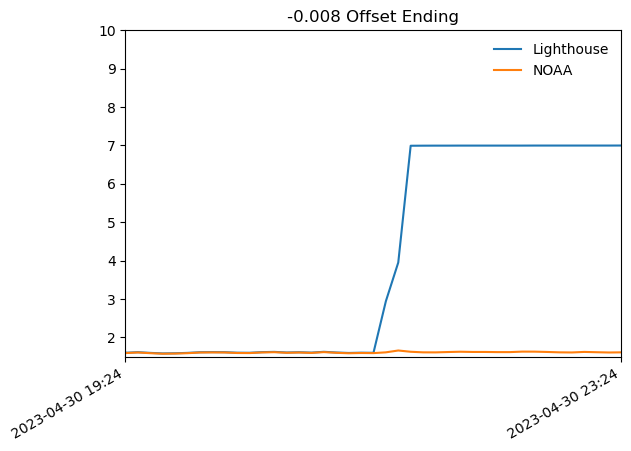

In [36]:

plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,10)

start_date = pd.to_datetime('2023-04-30 19:24')

end_date = pd.to_datetime('2023-04-30 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.008 Offset Ending')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.012 Offset Begining')

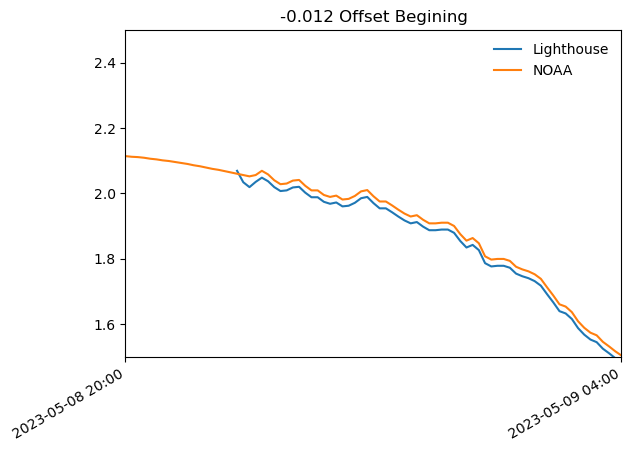

In [37]:


plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.5)

start_date = pd.to_datetime('2023-05-08 20:00')

end_date = pd.to_datetime('2023-05-09 04:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.012 Offset Begining')


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.012 Offset Ending')

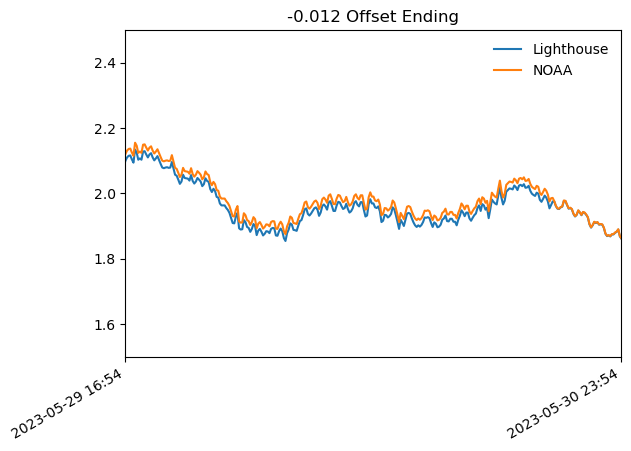

In [38]:



plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,2.5)

start_date = pd.to_datetime('2023-05-29 16:54')

end_date = pd.to_datetime('2023-05-30 23:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.012 Offset Ending')


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


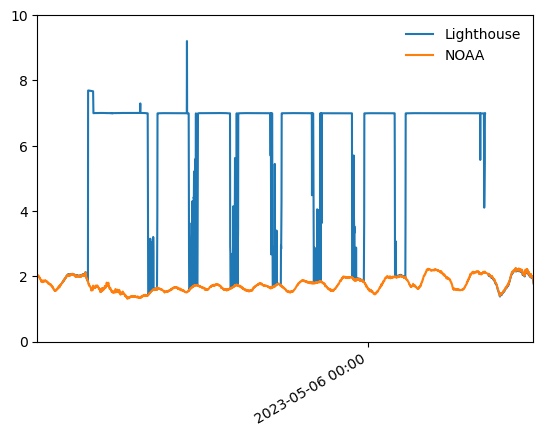

In [39]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(0,10)

start_date = pd.to_datetime('2023-04-28 00:00')

end_date = pd.to_datetime('2023-05-10 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
